In [1]:
from time import sleep
from IPython.display import Image, display
import numpy
import QDevil_QDAC2 as QDAC2
qdac_addr = '192.168.8.15'
qdac = QDAC2.QDac2('QDAC-II', visalib='@py', address=f'TCPIP::{qdac_addr}::5025::SOCKET')
import qcodes.instrument_drivers.rigol.DS1074Z as DS1000Z
rigol_addr = '192.168.8.199'
scope = DS1000Z.DS1074Z('rigol', visalib='@py', address=f'TCPIP::{rigol_addr}::INSTR')

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/jps/.qcodes/logs/command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : /Users/jps/.qcodes/logs/210901-16292-qcodes.log
Connected to: QDevil QDAC-II (serial:0, firmware:3-0.9.10) in 0.19s
Connected to: RIGOL TECHNOLOGIES DS1104Z (serial:DS1ZA171812151, firmware:00.04.03) in 0.03s


In [2]:
def capture():
    scope.write('stop')
    scope.write(":disp:data?")
    bmpdata = scope.visa_handle.read_raw()[2+9:]
    image = Image(data=bmpdata)
    display(image)

In [3]:
qdac.reset()
scope.write('*rst')
sleep(3)

In [4]:
scope.write('chan1:disp off')
scope.write('chan3:disp on')
scope.write('chan3:bwl on')
scope.write('chan3:prob 1')
scope.write('chan3:scal 0.2')
scope.write('chan3:offs -0.2')
scope.write('trig:edge:sour chan3')
scope.write('trig:edge:level 0.1')
scope.write('tim:scal 2e-6')
scope.write('tim:offs 5e-6')

In [5]:
qdac.remove_traces()
values = [0, 1, 0, 0.5, -0.5, 1, -0.8, 0.3, -0.7, 0]
trace = qdac.allocate_trace('my_trace', len(values))
trace.waveform(values)
awg = qdac.ch03.arbitrary_wave(trace.name)
qdac.errors()

'0, "No error"'

In [6]:
scope.write('sing')
sleep(2)
awg.start()
qdac.errors()

'0, "No error"'

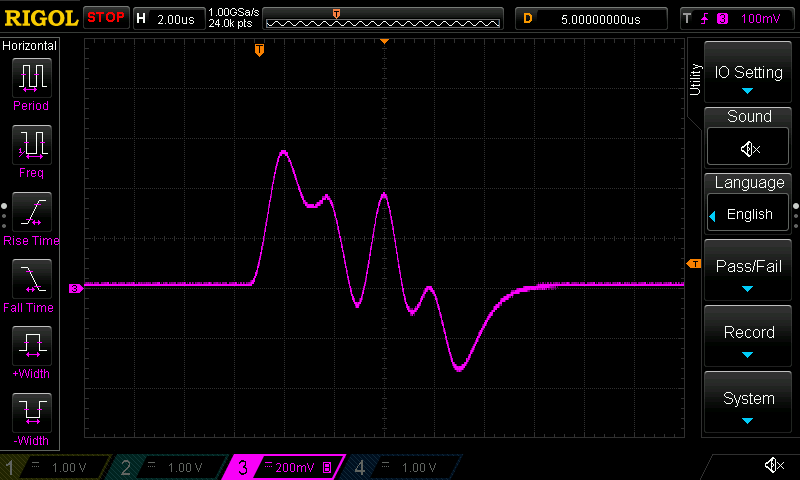

In [7]:
capture()

In [8]:
awg = qdac.ch03.arbitrary_wave(
    trace.name,
    repetitions=-1,
    scale=2,
    offset_V=-0.5
)
qdac.errors()

'0, "No error"'

In [9]:
scope.write('chan3:scal 0.25')
scope.write('chan3:offs 0.3')
scope.write('tim:scal 5e-6')
scope.write('tim:offs 0')
scope.write('trig:edge:level 0')
scope.write('run')

In [10]:
awg.start()

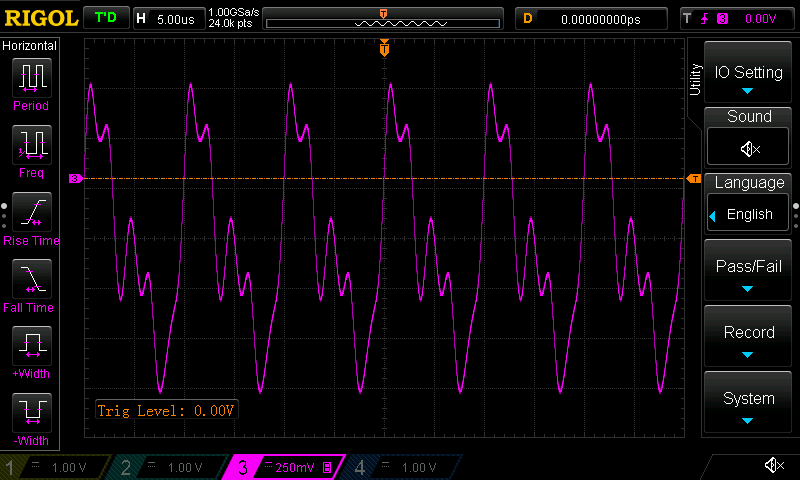

In [11]:
capture()

In [12]:
scope.write('run')
sleep(2)
awg.abort()

In [13]:
trigger = awg.period_end_marker()
qdac.ext4.width_s(2e-6)
qdac.ext4.polarity('norm')
qdac.ext4.source_from_trigger(trigger)
scope.write('chan4:disp on')
scope.write('chan4:bwl on')
scope.write('chan4:prob 1')
scope.write('chan4:scal 1')
scope.write('chan4:offs -2')
scope.write('tim:scal 2e-6')
scope.write('tim:offs 10e-6')
qdac.errors()

'0, "No error"'

In [14]:
scope.write('sing')
sleep(3)
awg.start()

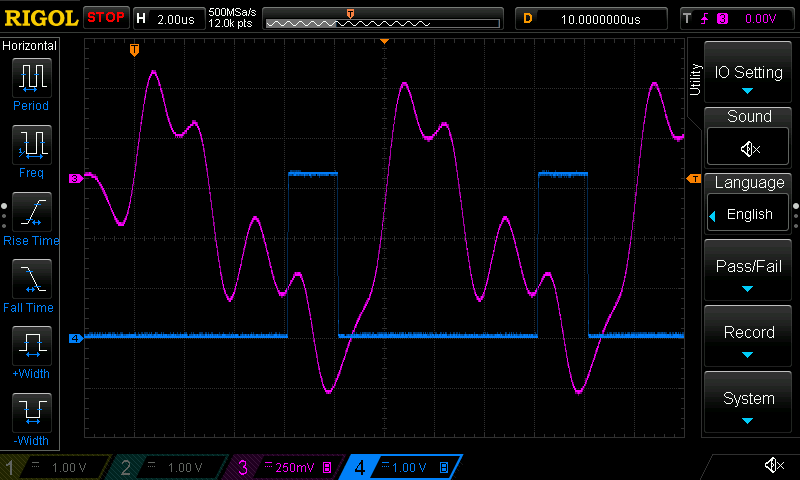

In [15]:
capture()

In [16]:
points = 4 * 1024 * 1024
trace = qdac.allocate_trace('long_trace', points)
qdac.errors()

'0, "No error"'

In [17]:
values = numpy.sin(numpy.linspace(-1000*numpy.pi, 1000*numpy.pi, points, endpoint=False))
trace.waveform(values)
qdac.errors()

'0, "No error"'

In [22]:
scope.write('chan2:disp on')
scope.write('chan2:bwl on')
scope.write('chan2:prob 1')
scope.write('chan2:scal 0.5')
scope.write('chan2:offs 0')

scope.write('chan3:scal 0.5')
scope.write('chan3:offs 0')

scope.write('chan4:disp off')

scope.write('tim:scal 2e-3')
scope.write('tim:offs 0')
scope.write('trig:edge:level 0')

scope.write('run')

In [23]:
awg = qdac.ch03.arbitrary_wave(trace.name, repetitions=-1, scale=1.5)
awg2 = qdac.ch02.arbitrary_wave(trace.name, repetitions=-1, scale=-0.5)
qdac.errors()

'0, "No error"'

In [24]:
scope.write('run')
qdac.start_all()
qdac.errors()

'0, "No error"'

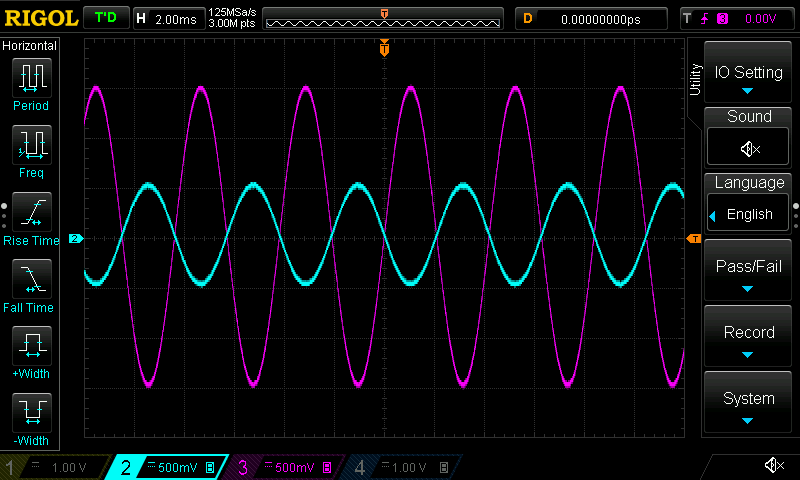

In [25]:
capture()